In [2]:
import pandas as pd
import numpy as np
import warnings

# 모든 경고 메시지 끄기
warnings.filterwarnings('ignore')

In [5]:
# !pip install missingno

# 데이터 결측치 시각화 

Index(['Unnamed: 0', 'surface_tp_train.stn', 'surface_tp_train.year',
       'surface_tp_train.mmddhh', 'surface_tp_train.ta', 'surface_tp_train.td',
       'surface_tp_train.hm', 'surface_tp_train.ws', 'surface_tp_train.rn',
       'surface_tp_train.re', 'surface_tp_train.ww', 'surface_tp_train.ts',
       'surface_tp_train.si', 'surface_tp_train.ss', 'surface_tp_train.sn'],
      dtype='object')
Index(['Unnamed: 0', 'surface_tp_test.stn', 'surface_tp_test.year',
       'surface_tp_test.mmddhh', 'surface_tp_test.ta', 'surface_tp_test.td',
       'surface_tp_test.hm', 'surface_tp_test.ws', 'surface_tp_test.rn',
       'surface_tp_test.re', 'surface_tp_test.ww', 'surface_tp_test.si',
       'surface_tp_test.ss', 'surface_tp_test.sn'],
      dtype='object')


<AxesSubplot:>

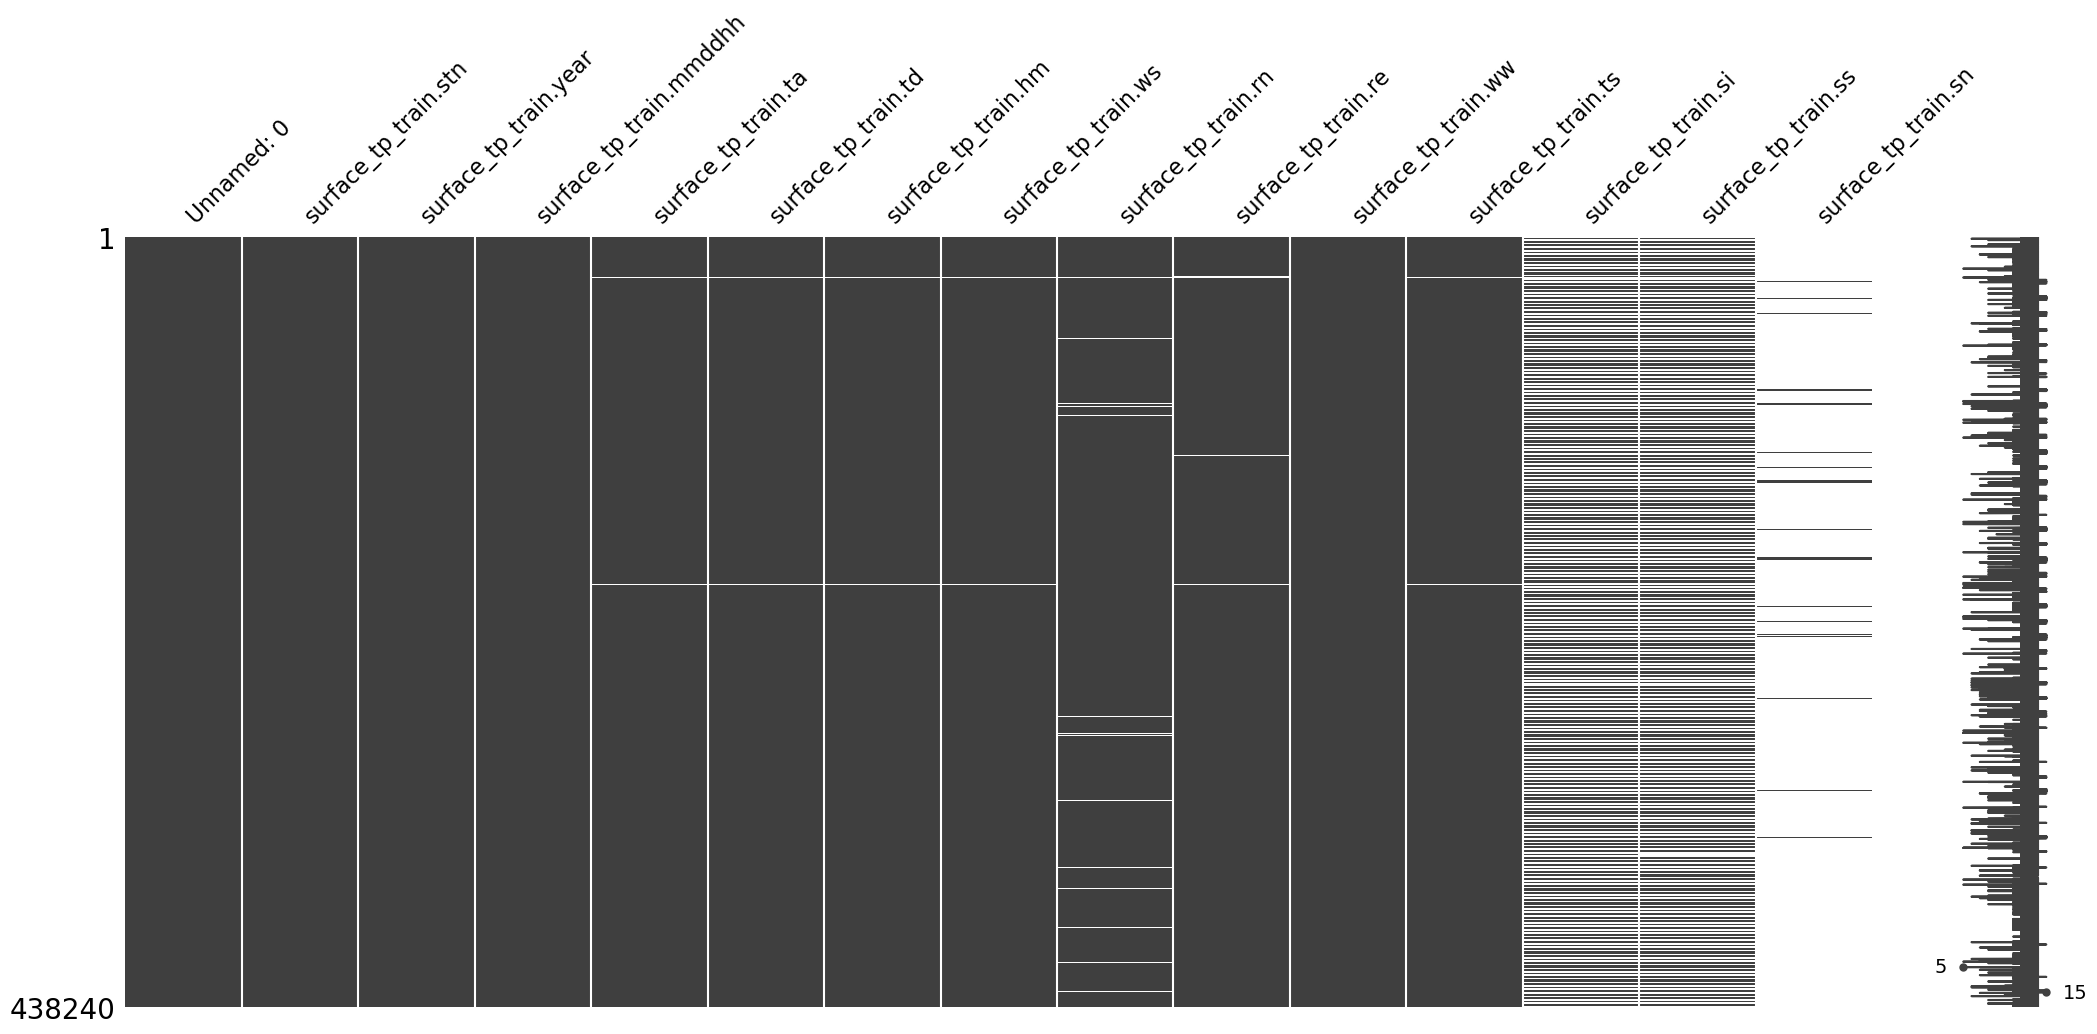

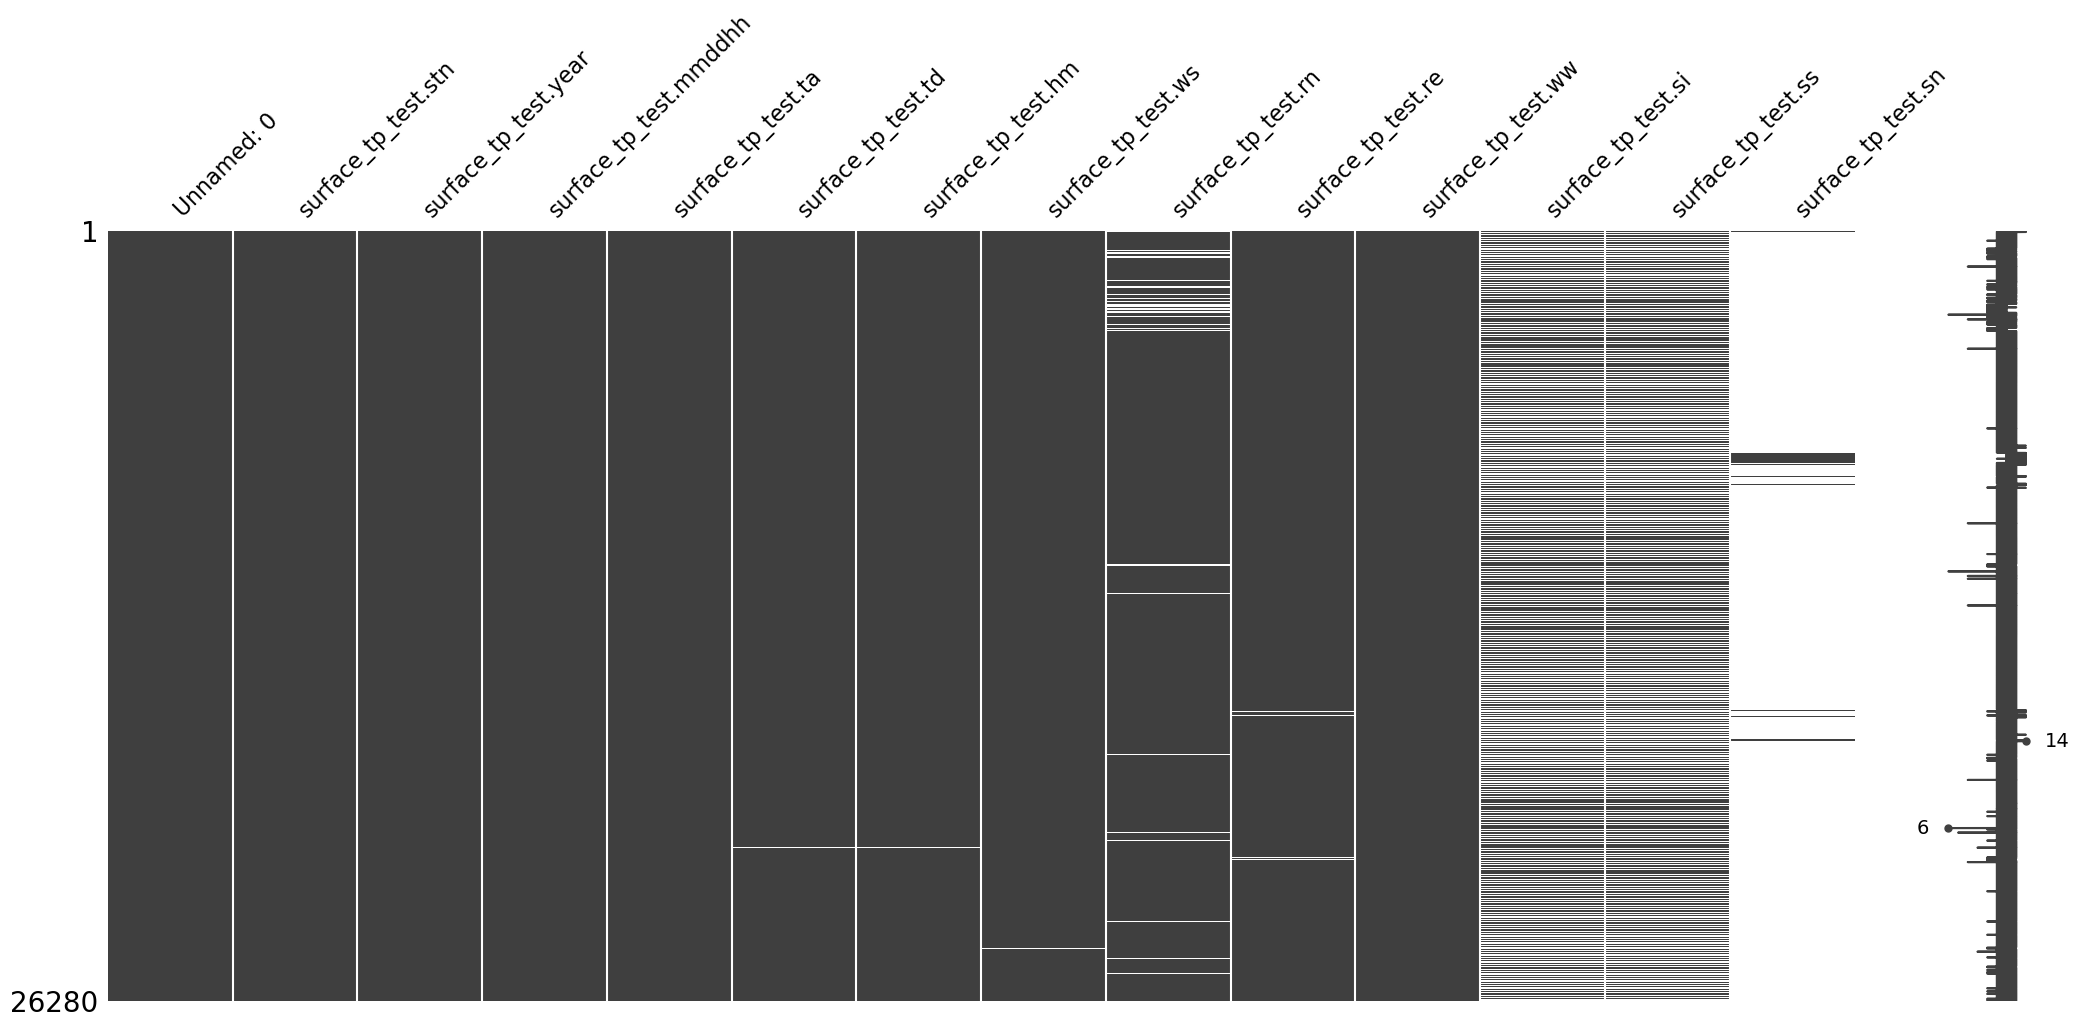

In [6]:
# 데이터 읽어오기
train = pd.read_csv("C:/Users/318si/OneDrive/바탕 화면/2023-여름/기상청공모전/데이터/지면온도/surface_tp_train.csv")
test= pd.read_csv("C:/Users/318si/OneDrive/바탕 화면/2023-여름/기상청공모전/데이터/지면온도/surface_tp_test.csv")

print(train.columns)
print(test.columns)

#train=train.drop(['Unnamed: 0','...1'],axis=1)
#test=test.drop(['Unnamed: 0'],axis=1)

train.replace([-99,-99.9,-999], pd.NA, inplace=True)
test.replace([-99,-99.9,-999], pd.NA, inplace=True)

#3-1 결측치 값 시각화
import missingno as msno

msno.matrix(train)
msno.matrix(test)

<AxesSubplot:>

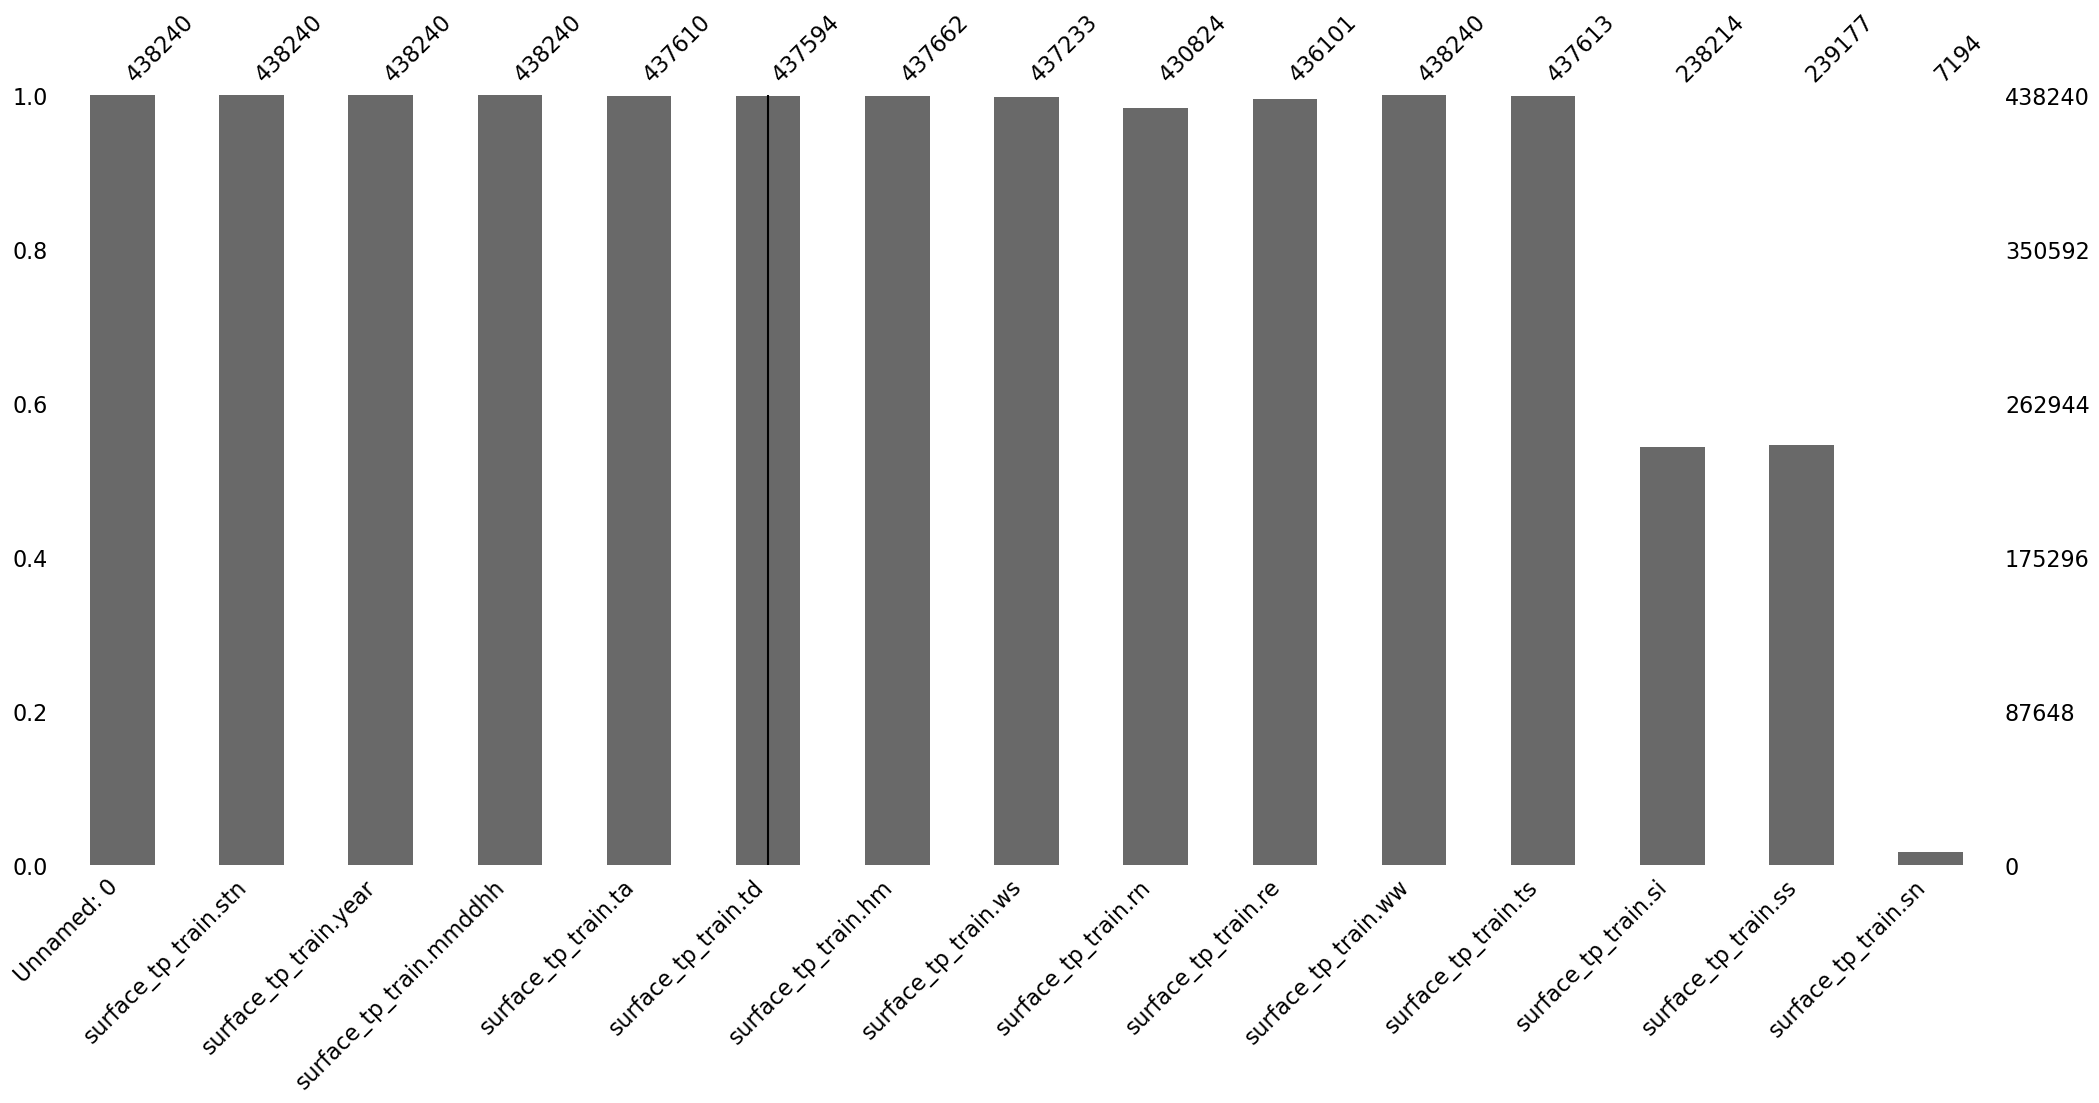

In [7]:
msno.dendrogram(train)
msno.bar(train)

# 데이터 분포 시각화 1

In [9]:
#train=pd.read_csv("C:/Users/shn20/Desktop/FILES/기상청/지면온도 데이터/지면온도train.csv")
#test=pd.read_csv("C:/Users/shn20/Desktop/FILES/기상청/지면온도 데이터/지면온도test.csv")

#train=train.drop(['Unnamed: 0'],axis=1)
#test=test.drop(['Unnamed: 0'],axis=1)

train['지점번호'] = train['지점번호'].astype('category')
test['지점번호'] = test['지점번호'].astype('category')

numeric=train.select_dtypes(include='number').columns 
print(numeric)

numeric=numeric.to_list()
numeric.remove('지면온도')
print(numeric)

KeyError: '지점번호'

In [ ]:
# 데이터 읽어오기

data_train = pd.read_csv("./surface_tp_train.csv")
data_test= pd.read_csv("./surface_tp_test.csv")

## 제거 : -99, -99.9, -999

import pandas as pd
import numpy as np

class data_preprocessing():
  def __init__(self, data, test):
    self.data = data
    self.na_counts = None
    self.list_na = None
    self.ratio_result = None
    self.list_columns = None
    self.test = test

  ## na 개수 발견
  def count_na_per_column(self):
    special_values = [-99, -99.9, -999]
    list_counts = []
    for col in self.data.columns:
        counts = self.data[col].isin(special_values).sum()
        list_counts.append(counts)
    self.list_na = list_counts
    return self.list_na

  def divide_list_elements(self, lst, divisor):
      divided_lst = [x / divisor for x in lst]
      return divided_lst

  ## na 개수 전체 데이터 중 비율 세기
  def ratio(self):
    self.ratio_result = self.divide_list_elements(self.list_na, len(self.data))
    return self.ratio_result

  def remove_column(self):
    self.list_columns = []
    # 역순으로 반복문 실행하여 열을 삭제
    for i in range(len(self.ratio_result)-1, -1, -1):
        if self.ratio_result[i] >= 0.4:
          self.list_columns.append(self.data.columns[i])
            # print(self.ratio_result[i])
            # print(i)
          self.data = self.data.drop(self.data.columns[i], axis=1)
    return self.data

  def remove_columns_test(self):
    data = self.data
    for i in self.list_columns:
      ## . 기준으로 마지막 부분 없애고,
      new_col = i.replace("train", "test")
      # print(new_col)
      try: ## train만 있는 열이 있을 경우에는 pass 하자
        data = data.drop(new_col, axis=1)
      except:
        pass
    return data


  def result(self, train_or_test):
    if train_or_test == "train":
      # self.replace_99()
      self.count_na_per_column()
      self.ratio()
      return self.remove_column()
    else:
      self.data = self.test
      # self.replace_99() ## null 로 변경
      return self.remove_columns_test() ## train에서 제거되는 행으로 제거

In [ ]:
dp= data_preprocessing(data_train, data_test)
result_train = dp.result('train')
result_train
result_test = dp.result("test")
result_test

In [ ]:
# result_train['hh'] = result_train['surface_tp_train.mmddhh'].astype(int).astype(str).str[-2:]
# result_train['dd'] = result_train['surface_tp_train.mmddhh'].astype(int).astype(str).str[-4:-2]
# result_train['mm'] = result_train['surface_tp_train.mmddhh'].astype(int).astype(str).str[:-4]
# year_mapping = {'A': 2001, 'B': 2002, 'C': 2003, 'D': 2004, 'E': 2005, 'F': 2006}
# result_train['new_year'] = result_train['surface_tp_train.year'].map(year_mapping)
# result_train['mm'] = result_train['mm'].apply(lambda x: x.zfill(2))
# result_train['date'] = pd.to_datetime(result_train['new_year'].astype(str) + result_train['mm'] + result_train['dd'] + result_train['hh'], format='%Y%m%d%H')

def adding_date(data_original, season): # season: all, spring, summer, fall, winter 계절별로 넣기 가능
  data = data_original
  data['hh'] = data['surface_tp_train.mmddhh'].astype(int).astype(str).str[-2:]
  data['dd'] = data['surface_tp_train.mmddhh'].astype(int).astype(str).str[-4:-2]
  data['mm'] = data['surface_tp_train.mmddhh'].astype(int).astype(str).str[:-4]
  year_mapping = {'A': 2001, 'B': 2002, 'C': 2003, 'D': 2004, 'E': 2005, 'F': 2006}
  data['new_year'] = data['surface_tp_train.year'].map(year_mapping)
  data['mm'] = data['mm'].apply(lambda x: x.zfill(2))
  data['date'] = pd.to_datetime(data['new_year'].astype(str) + data['mm'] + data['dd'] + data['hh'], format='%Y%m%d%H')

  spring_month_list = ['02', '03', '04']
  summer_month_list = ['05', '06', '07']
  fall_month_list = ['08', '09', '10']
  winter_month_list = ['11', '12', '01']

  if season == "all":
    pass
  elif season == "spring":
    filtered_data = data[data['mm'].isin(spring_month_list)]
  elif season == "summer":
    filtered_data = data[data['mm'].isin(summer_month_list)]
  elif season == "fall":
    filtered_data = data[data['mm'].isin(fall_month_list)]
  elif season == "winter":
    filtered_data = data[data['mm'].isin(winter_month_list)]
  else:
    raise ValueError("not season value")

  # data = filtered_data.drop(["surface_tp_train.year", 'surface_tp_train.mmddhh', 'hh', 'dd', 'mm', 'new_year'], axis = 1)
  data = filtered_data.drop(["surface_tp_train.year", 'surface_tp_train.mmddhh'], axis = 1)
  # data["datetime"] = pd.to_datetime(data["date"])  # 문자열을 날짜/시간 유형으로 변환
  ## datetime 순으로 index 생성
  data.reset_index(inplace=True)
  data.index = data.index.astype(int)
  return data

### 지역 별로 데이터를 쪼개주는 함수

def region_category(data, region_number): # region_number는 자기가 알아서 넣기로

  # 주어진 열을 기준으로 데이터 프레임을 필터링하고 값 종류별로 데이터를 쪼갬
  unique_values = data['surface_tp_train.stn'].unique()  # 주어진 열의 고유한 값들을 추출

  if region_number in unique_values:
    result = data[data['surface_tp_train.stn'] == region_number]  # 주어진 값에 해당하는 데이터만 필터링하여 저장
  else:
    raise ValueError("not in region number")

  return result


def change_columns(data):
  data.columns = data.columns.str.replace(".", "_")


def change_to_category(data, columns_name):
  data[columns_name] = data[columns_name].astype(str).astype('category')
  return data


In [ ]:
## int -> category 변경
def change_to_category(data, columns_name):
  data[columns_name] = data[columns_name].astype(str).astype('category')
  return data

def category_changing(data):
  list_columns = ["surface_tp_train.stn", "surface_tp_train.year", "surface_tp_train.mmddhh", "surface_tp_train.re", "surface_tp_train.ww"]
  for column in list_columns:
      data = change_to_category(data, column)

  return data

In [ ]:
train = category_changing(result_train)

new_column_names = {'surface_tp_train.stn': 'stn',
                    'surface_tp_train.year' : 'year',
                    'surface_tp_train.mmddhh' : 'mmddhh',
                    'surface_tp_train.ta' : 'ta',
                    'surface_tp_train.td' : 'td',
                    'surface_tp_train.hm' : 'hm',
                    'surface_tp_train.ws' : 'ws',
                    'surface_tp_train.rn' : 'rn',
                    'surface_tp_train.re' : 're',
                    'surface_tp_train.ww' : 'ww',
                    'surface_tp_train.ts' : 'ts'}
train = train.rename(columns=new_column_names)

import matplotlib.pyplot as plt
import seaborn as sns

cat = ["stn", "year",  "re", "ww", 'mmddhh']
list_all = train.columns.to_list()
numeric = list(set(list_all) - set(cat))

In [ ]:
def plot_numeric_variables(df, columns):
    num_columns = len(columns)
    num_rows = (num_columns + 1) // 3  # 나누어진 행의 개수

    fig, axs = plt.subplots(num_rows, 3, figsize=(12, num_rows*4))
    fig.subplots_adjust(hspace=0.4)

    for i, column in enumerate(columns):
        row = i // 3
        col = i % 3

        ax = axs[row, col]
        ax.hist(df[column], bins=100)
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')
        ax.set_title(f'{column}')

    # 남는 subplot이 있는 경우 비워두기
    if num_columns % 2 != 0:
        axs[-1, -1].axis('off')

    plt.tight_layout()
    plt.show()

plot_numeric_variables(train, numeric)

In [ ]:
def plot_categorical_variables(df, columns):
    num_columns = len(columns)
    num_rows = (num_columns + 1) // 2  # 나누어진 행의 개수

    fig, axs = plt.subplots(num_rows, 2, figsize=(12, num_rows*4))
    fig.subplots_adjust(hspace=0.4)

    for i, column in enumerate(columns):
        row = i // 2
        col = i % 2

        ax = axs[row, col]

        # 범주형 변수의 값 빈도수 계산
        category_counts = df[column].value_counts()

        # 비율이 5% 미만인 범주를 "기타"로 묶기
        total_samples = len(df)
        threshold_ratio = 0.05
        other_categories = category_counts[category_counts / total_samples < threshold_ratio].index
        category_counts = category_counts.drop(other_categories)
        category_counts['other'] = df[column].isin(other_categories).sum()

        ax.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%')
        ax.set_title(f'{column}')

    # 남는 subplot이 있는 경우 비워두기
    if num_columns % 2 != 0:
        axs[-1, -1].axis('off')

    plt.tight_layout()
    plt.show()


plot_categorical_variables(train, ["stn", "year",  "re", "ww"])

# 데이터 분포 시각화 2

In [ ]:
# set module
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np
import random
import os
import warnings
warnings.filterwarnings("ignore")


#from google.colab import drive
#drive.mount('/content/drive/')

new_dir = "C:/Users/subin/OneDrive - g.skku.edu/문서/2023 날씨 빅데이터 콘테스트"
os.chdir(new_dir)  # 현재 작업 디렉토리 변경
current_dir = os.getcwd()
print("현재 작업 디렉토리:", current_dir)

In [ ]:
# 데이터 읽어오기
train = pd.read_csv("./surface_tp_train.csv")
test= pd.read_csv("./surface_tp_test.csv")

#불필요한 column 삭제 
train = train.drop(['Unnamed: 0','...1'],axis=1)
test = test.drop('Unnamed: 0',axis=1)

#지점번호 열 삭제
train = train.drop('surface_tp_train.stn',axis=1)
test = test.drop('surface_tp_test.stn',axis=1)

#편리를 위해 변수명 변경
train.columns = train.columns.str.replace("surface_tp_train.", "")
test.columns = test.columns.str.replace("surface_tp_test.", "")

#-99.9 NA로 바꾸기 
train[train == -99.9] = np.nan
test[test == -99.9] = np.nan

In [ ]:
# check missing relationship 
msno.heatmap(train)

## 상관관계 시각화

In [ ]:
num_train = train[['ta', 'td', 'hm', 'ws', 'rn', 're', 'ts', 'si', 'ss', 'sn']]
num_train.corr(method='pearson')

In [ ]:
plt.figure(figsize=(10, 8)) 
plt.title("Correlation of Numeric Variables", y = 1.05, size = 18)
heatmap_num = sns.heatmap(num_train.corr(), linewidths = 0, vmax = 1, vmin = -1,
           square = True, cmap = 'RdBu', annot=True, annot_kws={"size": 9})

## 분포 시각화 

In [ ]:
fig, ax = plt.subplots(4, 2, figsize=(30,30)) 
colors = sns.color_palette('Dark2', n_colors=8)

ax1 = sns.histplot(train['ta'], kde=True, bins=30, ax=ax[0,0], color=colors[0], stat='probability')
ax1.set_ylabel('Density')

ax2 = sns.histplot(train['td'], kde=True, bins=30, ax=ax[0,1], alpha=0.3, color=colors[1], stat='probability')
ax2.set_ylabel('Density')

ax3 = sns.histplot(train['hm'], kde=True, bins=30, ax=ax[1,0], alpha=0.3, color=colors[2], stat='probability')
ax3.set_ylabel('Density')

ax4 = sns.histplot(train['ws'], kde=True, bins=30, ax=ax[1,1], alpha=0.3, color=colors[3], stat='probability')
ax4.set_ylabel('Density')

ax5 = sns.histplot(train['rn'], kde=True, bins=30, ax=ax[2,0], alpha=0.3, color=colors[4], stat='probability')
ax5.set_ylabel('Density')

ax6 = sns.histplot(train['re'], kde=True, bins=30, ax=ax[2,1], alpha=0.3, color=colors[5], stat='probability')
ax6.set_ylabel('Density')

ax7 = sns.histplot(train['ts'], kde=True, bins=30, ax=ax[3,0], alpha=0.3, color=colors[6], stat='probability')
ax7.set_ylabel('Density')

ax8 = sns.histplot(train['si'], kde=True, bins=30, ax=ax[3,1], alpha=0.3, color=colors[7], stat='probability')
ax8.set_ylabel('Density')

ax9 = sns.histplot(train['ss'], kde=True, bins=50, ax=ax[4,0], alpha=0.3, color=colors[8], stat='probability')
ax9.set_ylabel('Density')

ax10 = sns.histplot(train['sn'], kde=True, bins=50, ax=ax[4,1], alpha=0.3, color=colors[9], stat='probability')
ax10.set_ylabel('Density')

plt.show()

In [ ]:
plt.figure(figsize = (7,5))
sns.set_palette("Pastel1")
sns.countplot(data=train,x='ww')
plt.rc('font', size=5)

In [ ]:
train['ww'].value_counts()

In [ ]:
#ts에 따른 ww 시각화 
plt = sns.barplot(x="ww", y="ts", data=train, ci=95, palette='Pastel1')
plt.set_xticklabels(['H', 'C', 'F', 'S', 'R', 'X', 'G']) # 원래 범주의 의미를 살려서 x축 눈금 설정

# 데이터 보간 

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import BayesianRidge

In [ ]:
imputer=IterativeImputer(estimator=BayesianRidge(),
                         max_iter=30,random_state=1003,verbose=True)

In [ ]:
imputer=imputer.fit(train[numeric])

mp_num_train=imputer.transform(train[numeric])
imp_num_test=imputer.transform(test[numeric])

x_train_numh = pd.DataFrame(imp_num_train, columns=train[numeric].columns)
x_test_numh = pd.DataFrame(imp_num_test, columns=test[numeric].columns)

train2 = pd.concat([train['지면온도'],
                    train['time'],
                    train['현천계현천'],
                    x_train_numh],axis=1)
                    
test2 = pd.concat([test['time'],
                   test['현천계현천'],
                   x_test_numh],axis=1)

In [ ]:
train2.to_csv('지면온도train_imputed.csv',index=False)
test2.to_csv('지면온도test_imputed.csv',index=False)